# Exercises from Think Stats, 2nd Edition¶
http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

## Description
Exercise: Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [3]:
resp = nsfg.ReadFemResp()

In [4]:
# Lets look at how many rows and columns we are dealing with
resp.shape

(7643, 3087)

In [5]:
'''
We know that the resp dataframe has 7643 rows and 3087 columns.
We are only looking at one column in order to do the class bias calculation
So creating a subset with the required columns as resp_1
'''
resp_1 = resp[["caseid", "numkdhh"]]
resp_1.shape

(7643, 2)

In [6]:
# Let us look at the sample of the rows and the summary of the distribution
resp_1.head()
resp_1.numkdhh.describe()

count    7643.000000
mean        1.024205
std         1.188717
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: numkdhh, dtype: float64

In [7]:
# So summarizing the dataset shows that the number of kids below 18 in a household
resp_1.groupby("numkdhh").count()

,caseid
numkdhh,
0,3563
1,1636
2,1500
3,666
4,196
5,82


In [8]:
# PMF maps each value to its probability.
# Probability is a frequency expressed as a fraction of sample size n
# Now using the pmf class from thinkstats2 
pmf = thinkstats2.Pmf(resp_1.numkdhh)
pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318})

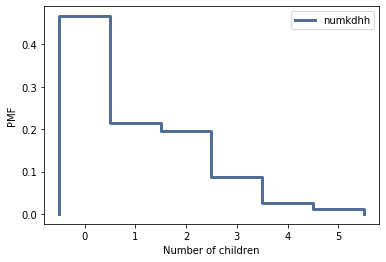

In [9]:
# Plotting the pmf in a histogram

pmf = thinkstats2.Pmf(resp_1.numkdhh, label = 'numkdhh')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

This function computes the biased PMF we would get if we surveyed the households and asked about the kids below 18 in each of them.

In [26]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [33]:
# Biased PMF
biased_pmf = BiasPmf(pmf, label = 'observed')
biased_pmf

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'observed')

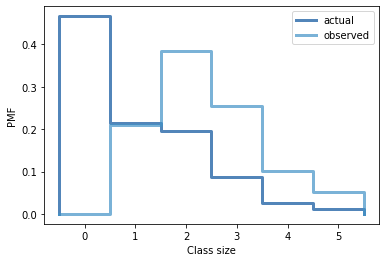

In [37]:
# The following graph shows the difference between the actual and observed distributions.
# The below plot shows that the actual probability is lower than the observed prob
pmf = thinkstats2.Pmf(resp_1.numkdhh, label = 'actual')
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

In [35]:
# The above behavior is reflected in the observed mean which is substantially higher than the actual.
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282
